In [1]:
# Create a SparkSession named "CSV Cleaning" for distributed data processing.
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("CSV Cleaning").getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/04/29 23:07:06 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
# Read the "zomato.csv" file into a Spark DataFrame with header recognition and automatic schema inference.
# Display the first 20 rows of the DataFrame.
df = spark.read.csv("zomato.csv", header=True, inferSchema=True)
df.show()

+--------------------+--------------------+--------------------+--------------------+--------------------+-----+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+---------------------------+--------------------+--------------------+--------------------+--------------------+
|                 url|             address|                name|        online_order|          book_table| rate|               votes|               phone|            location|           rest_type|          dish_liked|            cuisines|approx_cost(for two people)|        reviews_list|           menu_item|     listed_in(type)|     listed_in(city)|
+--------------------+--------------------+--------------------+--------------------+--------------------+-----+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+---------------------------+--------------------+-----------

In [3]:
# Import required PySpark SQL functions for data transformation.
from pyspark.sql.functions import split, size, expr, trim, when, col, avg

# Update the "location" column:
# - If "location" is null, empty, 'None', or 'No', extract the second last part of the "address" field as the location.
# - Otherwise, retain the original "location" value.
df = df.withColumn(
    "location",
    when(
        (col("location").isNull()) | (col("location") == 'None') | (col("location") == '') | (col("location") == 'No'),
        trim(expr("split(address, ',')[size(split(address, ',')) - 2]"))
    ).otherwise(col("location"))
)

In [4]:
# Print the schema of the DataFrame to display column names, data types, and nullability.
df.printSchema()

root
 |-- url: string (nullable = true)
 |-- address: string (nullable = true)
 |-- name: string (nullable = true)
 |-- online_order: string (nullable = true)
 |-- book_table: string (nullable = true)
 |-- rate: string (nullable = true)
 |-- votes: string (nullable = true)
 |-- phone: string (nullable = true)
 |-- location: string (nullable = true)
 |-- rest_type: string (nullable = true)
 |-- dish_liked: string (nullable = true)
 |-- cuisines: string (nullable = true)
 |-- approx_cost(for two people): string (nullable = true)
 |-- reviews_list: string (nullable = true)
 |-- menu_item: string (nullable = true)
 |-- listed_in(type): string (nullable = true)
 |-- listed_in(city): string (nullable = true)



In [5]:
# Filter the DataFrame to retain only rows where the "url" column starts with "https://".
df = df.filter(col("url").startswith("https://"))

In [6]:
# Display all distinct values from the "rate" column without truncating the output.
df.select("rate").distinct().show(df.count(),False)

+-------+
|rate   |
+-------+
|3.8/5  |
|2.2/5  |
|4.0 /5 |
|4.9/5  |
|4.9 /5 |
|3.3/5  |
|2.4/5  |
|4.2/5  |
|3.5 /5 |
|3.5/5  |
|3.6 /5 |
|2.3/5  |
|2.1/5  |
|3.1/5  |
|4.5/5  |
|4.0/5  |
|3.7 /5 |
|2.9 /5 |
|4.1 /5 |
|4.6/5  |
|2.8 /5 |
|NEW    |
|3.2 /5 |
|3.2/5  |
|2.9/5  |
|2.8/5  |
|3.4/5  |
|3.1 /5 |
|3.8 /5 |
|4.1/5  |
|-      |
|2.6 /5 |
|2.0/5  |
|4.2 /5 |
|4.5 /5 |
|3.9 /5 |
|1.8/5  |
|4.4/5  |
|2.7/5  |
|4.8/5  |
|4.6 /5 |
| India"|
|2.5 /5 |
|4.3/5  |
|2.6/5  |
|3.7/5  |
|3.6/5  |
|4.7/5  |
|3.3 /5 |
|4.4 /5 |
|3.0/5  |
|4.3 /5 |
|3.0 /5 |
|3.4 /5 |
|2.5/5  |
|3.9/5  |
|2.7 /5 |
|2.3 /5 |
|4.7 /5 |
|4.8 /5 |
|2.4 /5 |
|2.1 /5 |
|2.0 /5 |
|2.2 /5 |
|1.8 /5 |
|NULL   |
+-------+



In [7]:
# Clean the "rate" column:
# - Replace nulls, "NEW", "India\"", and "-" with 0 to represent missing or new ratings.
# - For other entries, extract the numeric rating part before the '/' character.
# Note: A value of 0 is interpreted as missing or new, not as an actual rating.
df = df.withColumn(
    "rate",
    when((col("rate").isNull()) | (col("rate") == "NEW") | (col("rate") == ' India"')|(col("rate") == '-'), 0)
    .otherwise(split(col("rate"), "/").getItem(0))
)

In [8]:
# Display all distinct values from the cleaned "rate" column without truncating the output.
df.select("rate").distinct().show(df.count(),False)

+----+
|rate|
+----+
|2.6 |
|3.1 |
|4.2 |
|4.4 |
|2.5 |
|3.7 |
|4.6 |
|3.0 |
|3.8 |
|4.4 |
|2.7 |
|2.9 |
|4.9 |
|4.5 |
|3.1 |
|0   |
|3.2 |
|4.5 |
|2.5 |
|2.4 |
|4.0 |
|4.9 |
|3.4 |
|2.6 |
|3.3 |
|1.8 |
|4.3 |
|3.5 |
|4.8 |
|4.1 |
|4.2 |
|4.6 |
|3.5 |
|4.0 |
|3.6 |
|3.4 |
|2.8 |
|2.0 |
|3.2 |
|2.2 |
|4.1 |
|3.3 |
|2.8 |
|3.7 |
|2.7 |
|3.6 |
|4.3 |
|3.8 |
|4.7 |
|2.3 |
|2.9 |
|3.0 |
|2.1 |
|3.9 |
|3.9 |
|4.7 |
|4.8 |
|2.3 |
|2.4 |
|1.8 |
|2.0 |
|2.1 |
|2.2 |
+----+



In [9]:
# Cast the "rate" column from string type to float type for numerical operations.
df = df.withColumn("rate", col("rate").cast("float"))

In [10]:
# Import the "sum" function from PySpark SQL functions.
from pyspark.sql.functions import sum


# Calculate the number of null values for each column in the DataFrame.
# Display the count of nulls per column.
null_counts = df.select([sum(col(c).isNull().cast("int")).alias(c) for c in df.columns])
null_counts.show()

+---+-------+----+------------+----------+----+-----+-----+--------+---------+----------+--------+---------------------------+------------+---------+---------------+---------------+
|url|address|name|online_order|book_table|rate|votes|phone|location|rest_type|dish_liked|cuisines|approx_cost(for two people)|reviews_list|menu_item|listed_in(type)|listed_in(city)|
+---+-------+----+------------+----------+----+-----+-----+--------+---------+----------+--------+---------------------------+------------+---------+---------------+---------------+
|  0|      0|   0|           0|         0|   0|    0| 1208|      30|    20155|     39980|   20056|                      20359|       20013|    20027|          20021|          20038|
+---+-------+----+------------+----------+----+-----+-----+--------+---------+----------+--------+---------------------------+------------+---------+---------------+---------------+



In [11]:
# Count the number of rows where the "rate" column is equal to 0 (interpreted as missing or new ratings).
df.filter(col('rate')==0).count()

10057

In [12]:
# Retrieve distinct locations where the "rate" is 0 (missing or new ratings).
# Convert the result to a list and print it.
locations = df.filter(col("rate") == 0).select("location").distinct().rdd.flatMap(lambda x: x).collect()
print(locations)

['Near Bangalore Furniture', 'Bangalore', 'BTM Layout', 'Cooke Town', 'Bellandur', '6th Phase JP Nagar', 'M Road Benson Town Frazer Town', 'East Bangalore', 'Indiranagar', 'BTM', 'Banashankari', 'Koramangala 7th Block', '461/1', 'Electronic City Phase 2', 'Nagarbhavi', 'JP Nagar', 'Lavelle Road', 'Marappa Garden', 'Koramangala 3rd Block', 'Kammanahalli', 'Opp. Canara Bank Atm', 'Bazar Street', 'Koramangala 2nd Block', 'St. Marks Road', 'MahadevaPura', 'Majestic', 'JP Nagar 5th Phase', 'CV Raman Nagar', 'ITPL Main Road, Whitefield', '9th block Jayanagar', 'Jayanagar', 'Electronic City', 'basavanagudi', 'Brigade Road', 'Frazer Town', 'Varthur Main Road', 'Church Street', 'HSR', 'Rajajinagar', 'City Market', 'Bellandur Village', 'Thubarahalli Brookefield', 'Koramangala 6th Block', 'Jalahalli', 'Ulsoor', "Teacher's Colony", 'Electronic city', 'se HSR', 'Bilkhelli', 'Off Sarjapur Road', 'Jakkur', 'Wilson Garden', 'North Bangalore', 'Koramangala', 'Vasanth Nagar', 'Residency Road', 'HMR Comp

In [13]:
# Display the "address" values for rows where the "location" column is empty.
# Show the full content without truncation.
df.filter(col("location") == '').select('address').show(truncate=False)

+---------------------------------------------------------+
|address                                                  |
+---------------------------------------------------------+
|5/1, 2nd Cross, MSRE College road, Mathikere, , Bangalore|
+---------------------------------------------------------+



In [14]:
# Display the "address" values for rows where the "location" column is null.
# Show the full content without truncation.
df.filter(col("location") == None).select('address').show(truncate=False)

+-------+
|address|
+-------+
+-------+



In [15]:
# Display all "address" values where the "location" column is null.
# Show all matching rows without truncating the output.
df.filter(col("location").isNull()).select('address').show(df.count(),False)

+------------------------------------------------------------------+
|address                                                           |
+------------------------------------------------------------------+
|Delivery Only                                                     |
|Best Of Bengal                                                    |
|Delivery Only                                                     |
|Delivery Only                                                     |
|Delivery Only                                                     |
|somasundra palaya                                                 |
|Delivery Only                                                     |
|Indira Nagar                                                      |
|Delivery Only                                                     |
|New Thippasandra                                                  |
|Delivery Only                                                     |
|Delivery Only                    

In [16]:
# Drop rows where the "location" column is null, 
# since both location and rating are missing for these restaurants.
df = df.dropna(subset=["location"])

In [17]:
# Recalculate and display the number of null values for each column after dropping rows with null "location".
null_counts = df.select([sum(col(c).isNull().cast("int")).alias(c) for c in df.columns])
null_counts.show()

+---+-------+----+------------+----------+----+-----+-----+--------+---------+----------+--------+---------------------------+------------+---------+---------------+---------------+
|url|address|name|online_order|book_table|rate|votes|phone|location|rest_type|dish_liked|cuisines|approx_cost(for two people)|reviews_list|menu_item|listed_in(type)|listed_in(city)|
+---+-------+----+------------+----------+----+-----+-----+--------+---------+----------+--------+---------------------------+------------+---------+---------------+---------------+
|  0|      0|   0|           0|         0|   0|    0| 1208|       0|    20125|     39950|   20026|                      20329|       19983|    19997|          19991|          20008|
+---+-------+----+------------+----------+----+-----+-----+--------+---------+----------+--------+---------------------------+------------+---------+---------------+---------------+



In [18]:
# Filter out rows where the "location" column is an empty string.
df = df.filter(col("location") != "")

In [19]:
# Recalculate and display the number of null values for each column after removing rows with empty "location".
null_counts = df.select([sum(col(c).isNull().cast("int")).alias(c) for c in df.columns])
null_counts.show()

+---+-------+----+------------+----------+----+-----+-----+--------+---------+----------+--------+---------------------------+------------+---------+---------------+---------------+
|url|address|name|online_order|book_table|rate|votes|phone|location|rest_type|dish_liked|cuisines|approx_cost(for two people)|reviews_list|menu_item|listed_in(type)|listed_in(city)|
+---+-------+----+------------+----------+----+-----+-----+--------+---------+----------+--------+---------------------------+------------+---------+---------------+---------------+
|  0|      0|   0|           0|         0|   0|    0| 1208|       0|    20124|     39949|   20025|                      20328|       19982|    19996|          19990|          20007|
+---+-------+----+------------+----------+----+-----+-----+--------+---------+----------+--------+---------------------------+------------+---------+---------------+---------------+



In [20]:
# Retrieve and print the distinct locations where the "rate" is still 0 after cleaning.
locations = df.filter(col("rate") == 0).select("location").distinct().rdd.flatMap(lambda x: x).collect()
print(locations)

['Near Bangalore Furniture', 'Bangalore', 'BTM Layout', 'Cooke Town', 'Bellandur', '6th Phase JP Nagar', 'M Road Benson Town Frazer Town', 'East Bangalore', 'Indiranagar', 'BTM', 'Banashankari', 'Koramangala 7th Block', '461/1', 'Electronic City Phase 2', 'Nagarbhavi', 'JP Nagar', 'Lavelle Road', 'Marappa Garden', 'Koramangala 3rd Block', 'Kammanahalli', 'Opp. Canara Bank Atm', 'Bazar Street', 'Koramangala 2nd Block', 'St. Marks Road', 'MahadevaPura', 'Majestic', 'JP Nagar 5th Phase', 'CV Raman Nagar', 'ITPL Main Road, Whitefield', '9th block Jayanagar', 'Jayanagar', 'Electronic City', 'basavanagudi', 'Brigade Road', 'Frazer Town', 'Varthur Main Road', 'Church Street', 'HSR', 'Rajajinagar', 'City Market', 'Bellandur Village', 'Thubarahalli Brookefield', 'Koramangala 6th Block', 'Jalahalli', 'Ulsoor', "Teacher's Colony", 'Electronic city', 'se HSR', 'Bilkhelli', 'Off Sarjapur Road', 'Jakkur', 'Wilson Garden', 'North Bangalore', 'Koramangala', 'Vasanth Nagar', 'Residency Road', 'HMR Comp

In [21]:
len(locations)

152

In [22]:
# Join the DataFrame with the average "rate" per "location" (excluding zero ratings).
# Add a new column "alr" (average location rating) to each row based on its location.
df = df.join(df.filter(col("rate") != 0).groupBy("location").agg(avg("rate").alias("alr")), on="location", how="left")

In [23]:
# Display all distinct values from the "alr" (average location rating) column without truncating the output.
df.select("alr").distinct().show(df.count(),False)

+------------------+
|alr               |
+------------------+
|3.5101886812246073|
|3.8741935671691374|
|3.8396552225639082|
|3.6518518606821697|
|3.5               |
|3.200000047683716 |
|3.499999988646734 |
|3.7817110877855917|
|3.640000057220459 |
|3.7111111217074924|
|3.7964286003793988|
|3.7818181731484155|
|3.7745318323485413|
|4.014285700661795 |
|3.6295454610477793|
|3.7758620360801958|
|3.5110548502282253|
|3.807407502774839 |
|3.7222222487131753|
|3.477692311543685 |
|3.800000031789144 |
|3.671227366871517 |
|3.6963054006322853|
|3.464596262629728 |
|3.6918326597289735|
|3.5044642963579724|
|3.7494252495382026|
|3.74444446961085  |
|3.6599999904632567|
|3.5368420701277885|
|3.771428572504144 |
|4.007535720707896 |
|3.9653846208865824|
|3.5151975662150283|
|3.536572617796895 |
|3.610352427948939 |
|3.9186682576373415|
|3.480645168212152 |
|3.540000009536743 |
|3.503184719450155 |
|3.515730338150196 |
|3.6737113281623603|
|3.9384615971491885|
|3.542703085199352 |
|3.4280000019

In [24]:
df.show()

+------------+--------------------+--------------------+--------------------+------------+----------+----+-----+--------------+-------------------+--------------------+--------------------+---------------------------+--------------------+--------------------+--------------------+--------------------+------------------+
|    location|                 url|             address|                name|online_order|book_table|rate|votes|         phone|          rest_type|          dish_liked|            cuisines|approx_cost(for two people)|        reviews_list|           menu_item|     listed_in(type)|     listed_in(city)|               alr|
+------------+--------------------+--------------------+--------------------+------------+----------+----+-----+--------------+-------------------+--------------------+--------------------+---------------------------+--------------------+--------------------+--------------------+--------------------+------------------+
|Banashankari|https://www.zomat...|94

In [25]:
# Replace "rate" with "alr" (average location rating) for rows where the original "rate" is 0.
# Otherwise, retain the existing "rate" value.
df = df.withColumn("rate", when(col("rate") == 0, col("alr")).otherwise(col("rate")))

In [26]:
# Drop the "alr" (average location rating) column as it is no longer needed after filling missing rates.
df = df.drop("alr")

In [27]:
# Recalculate and display the number of null values for each column after final cleaning steps.
null_counts = df.select([sum(col(c).isNull().cast("int")).alias(c) for c in df.columns])
null_counts.show()

+--------+---+-------+----+------------+----------+----+-----+-----+---------+----------+--------+---------------------------+------------+---------+---------------+---------------+
|location|url|address|name|online_order|book_table|rate|votes|phone|rest_type|dish_liked|cuisines|approx_cost(for two people)|reviews_list|menu_item|listed_in(type)|listed_in(city)|
+--------+---+-------+----+------------+----------+----+-----+-----+---------+----------+--------+---------------------------+------------+---------+---------------+---------------+
|       0|  0|      0|   0|           0|         0| 196|    0| 1208|    20124|     39949|   20025|                      20328|       19982|    19996|          19990|          20007|
+--------+---+-------+----+------------+----------+----+-----+-----+---------+----------+--------+---------------------------+------------+---------+---------------+---------------+



In [28]:
# Drop rows where the "rate" column is null to ensure all entries have a valid rating.
df = df.dropna(subset=["rate"])

In [29]:
# Recalculate and display the number of null values for each column after removing rows with null "rate".
null_counts = df.select([sum(col(c).isNull().cast("int")).alias(c) for c in df.columns])
null_counts.show()

+--------+---+-------+----+------------+----------+----+-----+-----+---------+----------+--------+---------------------------+------------+---------+---------------+---------------+
|location|url|address|name|online_order|book_table|rate|votes|phone|rest_type|dish_liked|cuisines|approx_cost(for two people)|reviews_list|menu_item|listed_in(type)|listed_in(city)|
+--------+---+-------+----+------------+----------+----+-----+-----+---------+----------+--------+---------------------------+------------+---------+---------------+---------------+
|       0|  0|      0|   0|           0|         0|   0|    0| 1205|    19936|     39758|   19837|                      20140|       19797|    19811|          19805|          19822|
+--------+---+-------+----+------------+----------+----+-----+-----+---------+----------+--------+---------------------------+------------+---------+---------------+---------------+



In [30]:
# Drop unnecessary columns: "url", "address", "phone", "reviews_list", "menu_item", and "listed_in(city)" from the DataFrame.
df=df.drop("url", "address", "phone", "reviews_list", "menu_item", "listed_in(city)")

In [31]:
# Calculate total, distinct, and duplicate row counts in the DataFrame.
total_rows = df.count()

# Count the number of distinct rows.
distinct_rows = df.distinct().count()

# Calculate the number of duplicate rows.
duplicate_count = total_rows - distinct_rows

# Print total, distinct, and duplicate row counts.
print(f"Total rows: {total_rows}")
print(f"Distinct rows: {distinct_rows}")
print(f"Duplicate rows: {duplicate_count}")

Total rows: 51490
Distinct rows: 23390
Duplicate rows: 28100


In [32]:
# Recalculate and display the number of null values for each column after duplicate analysis.
null_counts = df.select([sum(col(c).isNull().cast("int")).alias(c) for c in df.columns])
null_counts.show()

+--------+----+------------+----------+----+-----+---------+----------+--------+---------------------------+---------------+
|location|name|online_order|book_table|rate|votes|rest_type|dish_liked|cuisines|approx_cost(for two people)|listed_in(type)|
+--------+----+------------+----------+----+-----+---------+----------+--------+---------------------------+---------------+
|       0|   0|           0|         0|   0|    0|    19936|     39758|   19837|                      20140|          19805|
+--------+----+------------+----------+----+-----+---------+----------+--------+---------------------------+---------------+



In [33]:
# Display all distinct values from the "online_order" column to understand its unique entries.
df.select(col("online_order")).distinct().show()

+------------+
|online_order|
+------------+
|          No|
|         Yes|
+------------+



In [34]:
# Display all distinct values from the "book_table" column to understand its unique entries.
df.select(col("book_table")).distinct().show()

+----------+
|book_table|
+----------+
|        No|
|       Yes|
+----------+



In [35]:
# Display all distinct values from the "votes" column.
# Using df.count() ensures all distinct "votes" values are shown without truncation.
df.select(col("votes")).distinct().show(df.count())

+-----+
|votes|
+-----+
|  691|
|  467|
|  296|
|  829|
|  675|
| 1512|
| 1159|
| 2069|
| 8304|
| 2136|
| 2162|
|  125|
|  800|
| 1394|
|  853|
|  451|
| 3826|
|  944|
| 2464|
| 1372|
| 2275|
| 2110|
| 1746|
|  666|
| 1265|
| 1870|
|  926|
| 1361|
| 1280|
| 2725|
|  870|
|  919|
| 3838|
| 1808|
| 1241|
| 5913|
|   51|
|    7|
|  447|
|  124|
| 1903|
|  591|
| 2930|
| 2034|
|  613|
|  475|
|  307|
| 6348|
| 1445|
| 7544|
| 1773|
|14654|
| 3902|
|  718|
|  574|
| 2161|
| 4464|
| 1897|
| 7574|
|  334|
|  169|
| 1043|
|  205|
|  577|
| 4569|
|  544|
| 1706|
|  581|
|  747|
|  740|
| 3848|
| 1880|
| 2402|
|  975|
| 4315|
| 2392|
| 3656|
|  442|
| 1956|
|  462|
| 1418|
|  743|
| 1104|
|  272|
|  470|
|  647|
|  711|
| 2249|
| 4408|
|  383|
|   15|
|   54|
| 1305|
|  448|
| 1765|
|  232|
| 1008|
|  234|
|  282|
| 2729|
| 2341|
|  700|
|10512|
| 2144|
| 2720|
| 3953|
| 1207|
|  886|
|  155|
|  851|
|  635|
| 1496|
| 6875|
|  483|
| 2415|
| 1791|
| 1377|
|  940|
| 3996|
| 5352|
|  154|
|  727|


In [36]:
# Display all distinct values from the "name" column without truncating the output.
# Using df.count() ensures all distinct "name" values are shown.
df.select(col("name")).distinct().show(df.count(),False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------+
|name                                                                                                                                                           |
+---------------------------------------------------------------------------------------------------------------------------------------------------------------+
|Fruit Face                                                                                                                                                     |
|Homely Kitchen                                                                                                                                                 |
|On The Nose                                                                                                                                                    |
|Arabian Bites              

In [37]:
# Import the regexp_replace function for regular expression-based replacements.
from pyspark.sql.functions import regexp_replace

# Clean the "name" column by removing all special characters, 
# keeping only letters, numbers, and whitespace.
df = df.withColumn("name", regexp_replace("name", "[^a-zA-Z0-9\s]", ""))

# Display the updated DataFrame without truncating the output.
df.show(truncate=False)

+----------+---------------------------+------------+----------+------------------+-----+---------+----------+--------+---------------------------+---------------+
|location  |name                       |online_order|book_table|rate              |votes|rest_type|dish_liked|cuisines|approx_cost(for two people)|listed_in(type)|
+----------+---------------------------+------------+----------+------------------+-----+---------+----------+--------+---------------------------+---------------+
|Bangalore |Nandhini Deluxe            |No          |No        |2.5999999046325684|283  |NULL     |NULL      |NULL    |NULL                       |NULL           |
|Bangalore |Nandhini Deluxe            |No          |No        |2.5999999046325684|283  |NULL     |NULL      |NULL    |NULL                       |NULL           |
|Bangalore |Food Box Cafe              |No          |No        |3.5999999046325684|36   |NULL     |NULL      |NULL    |NULL                       |NULL           |
|Bangalore |Anan

In [38]:
# Display all distinct cleaned "name" values without truncating the output.
# Using df.count() ensures all distinct "name" entries are shown.
df.select(col("name")).distinct().show(df.count(), False)

+-----------------------------------------------------+
|name                                                 |
+-----------------------------------------------------+
|Manis Dum Biryani                                    |
|Fruit Face                                           |
|Homely Kitchen                                       |
|On The Nose                                          |
|Arabian Bites                                        |
|Svadu Sweets                                         |
|Calvins                                              |
|Anna Kuteera                                         |
|Iyers Tiffin Centre                                  |
|Frolic                                               |
|Smokey Tribe Restaurant                              |
|Mango Tree The Beer Garden                           |
|Arzak                                                |
|Nuty                                                 |
|Yomama                                         

In [39]:
# Import the round function to round numerical values.
from pyspark.sql.functions import round

# Create a new column "rating" by rounding the "rate" values to 1 decimal place.
df = df.withColumn("rating", round("rate", 1))

# Drop the old "rate" column after transferring its values to "rating".
df = df.drop("rate")

In [40]:
df.show()

+----------+--------------------+------------+----------+-----+---------+----------+--------+---------------------------+---------------+------+
|  location|                name|online_order|book_table|votes|rest_type|dish_liked|cuisines|approx_cost(for two people)|listed_in(type)|rating|
+----------+--------------------+------------+----------+-----+---------+----------+--------+---------------------------+---------------+------+
| Bangalore|     Nandhini Deluxe|          No|        No|  283|     NULL|      NULL|    NULL|                       NULL|           NULL|   2.6|
| Bangalore|     Nandhini Deluxe|          No|        No|  283|     NULL|      NULL|    NULL|                       NULL|           NULL|   2.6|
| Bangalore|       Food Box Cafe|          No|        No|   36|     NULL|      NULL|    NULL|                       NULL|           NULL|   3.6|
| Bangalore|     Anand Sagar Inn|          No|        No|    6|     NULL|      NULL|    NULL|                       NULL|         

In [41]:
# Recalculate and display the number of null values for each column after updating the "rating" column.
null_counts = df.select([sum(col(c).isNull().cast("int")).alias(c) for c in df.columns])
null_counts.show()

+--------+----+------------+----------+-----+---------+----------+--------+---------------------------+---------------+------+
|location|name|online_order|book_table|votes|rest_type|dish_liked|cuisines|approx_cost(for two people)|listed_in(type)|rating|
+--------+----+------------+----------+-----+---------+----------+--------+---------------------------+---------------+------+
|       0|   0|           0|         0|    0|    19936|     39758|   19837|                      20140|          19805|     0|
+--------+----+------------+----------+-----+---------+----------+--------+---------------------------+---------------+------+



In [42]:
# Display all distinct values from the "approx_cost(for two people)" column.
# Using df.count() ensures all distinct entries are shown without truncation.
df.select(col("approx_cost(for two people)")).distinct().show(df.count())

+---------------------------+
|approx_cost(for two people)|
+---------------------------+
|                        800|
|                      5,000|
|                      1,350|
|                        700|
|                        200|
|                      1,400|
|                      2,000|
|                        250|
|                      2,100|
|                        160|
|                      1,700|
|                      1,800|
|                        199|
|                      1,650|
|                      1,600|
|                      1,100|
|                        560|
|                        850|
|                      1,500|
|                        300|
|                        100|
|                      2,700|
|                         70|
|                        140|
|                        120|
|                        130|
|                      1,250|
|                      1,900|
|                      2,800|
|                         60|
|         

In [43]:
# Join the DataFrame with the average "approx_cost(for two people)" per "location" (excluding null values).
# Add a new column "avg_approx_cost" representing the average approximate cost for each location.
df = df.join(
    df.filter(col("approx_cost(for two people)").isNotNull())
      .groupBy("location")
      .agg(avg("approx_cost(for two people)").alias("avg_approx_cost")),
    on="location",
    how="left"
)

# Fill null values in "approx_cost(for two people)" with the corresponding location's average cost.
df = df.withColumn(
    "approx_cost(for two people)",
    when(col("approx_cost(for two people)").isNull(), col("avg_approx_cost")).otherwise(col("approx_cost(for two people)"))
)

# Drop the temporary "avg_approx_cost" column after filling missing values.
df = df.drop("avg_approx_cost")

# Display the updated DataFrame without truncating the output.
df.show(truncate=False)

+----------+---------------------------+------------+----------+-----+---------+----------+--------+---------------------------+---------------+------+
|location  |name                       |online_order|book_table|votes|rest_type|dish_liked|cuisines|approx_cost(for two people)|listed_in(type)|rating|
+----------+---------------------------+------------+----------+-----+---------+----------+--------+---------------------------+---------------+------+
|BTM Layout|The London Shakes          |Yes         |No        |0    |NULL     |NULL      |NULL    |NULL                       |NULL           |3.5   |
|BTM Layout|Kulfi  More                |Yes         |No        |46   |NULL     |NULL      |NULL    |NULL                       |NULL           |3.7   |
|Bangalore |Nandhini Deluxe            |No          |No        |283  |NULL     |NULL      |NULL    |NULL                       |NULL           |2.6   |
|Bangalore |Nandhini Deluxe            |No          |No        |283  |NULL     |NULL    

In [44]:
# Recalculate and display the number of null values for each column after filling missing approximate costs.
null_counts = df.select([sum(col(c).isNull().cast("int")).alias(c) for c in df.columns])
null_counts.show()

+--------+----+------------+----------+-----+---------+----------+--------+---------------------------+---------------+------+
|location|name|online_order|book_table|votes|rest_type|dish_liked|cuisines|approx_cost(for two people)|listed_in(type)|rating|
+--------+----+------------+----------+-----+---------+----------+--------+---------------------------+---------------+------+
|       0|   0|           0|         0|    0|    19936|     39758|   19837|                       1146|          19805|     0|
+--------+----+------------+----------+-----+---------+----------+--------+---------------------------+---------------+------+



In [45]:
# Rename the "approx_cost(for two people)" column to "two_people_cost" for clarity and simplicity.
df = df.withColumnRenamed("approx_cost(for two people)", "two_people_cost")

In [46]:
# Calculate the overall average value of "two_people_cost" across all rows.
# Store the result in the variable "mnc".
mnc = df.select(avg("two_people_cost")).first()[0]

In [47]:
mnc

391.75885672148667

In [48]:
# Fill any remaining null values in the "two_people_cost" column with the overall average cost (mnc).
df = df.fillna({"two_people_cost": mnc})

In [49]:
# Recalculate and display the number of null values for each column after filling missing "two_people_cost" values.
null_counts = df.select([sum(col(c).isNull().cast("int")).alias(c) for c in df.columns])
null_counts.show()

+--------+----+------------+----------+-----+---------+----------+--------+---------------+---------------+------+
|location|name|online_order|book_table|votes|rest_type|dish_liked|cuisines|two_people_cost|listed_in(type)|rating|
+--------+----+------------+----------+-----+---------+----------+--------+---------------+---------------+------+
|       0|   0|           0|         0|    0|    19936|     39758|   19837|              0|          19805|     0|
+--------+----+------------+----------+-----+---------+----------+--------+---------------+---------------+------+



In [50]:
# Display all distinct values from the "listed_in(type)" column.
# Using df.count() ensures all distinct entries are shown without truncating.
df.select(col("listed_in(type)")).distinct().show(df.count())

+--------------------+
|     listed_in(type)|
+--------------------+
| ""RATED\n  Visit...|
| ""RATED\n  Order...|
| ""RATED\n  After...|
| 'RATED\n  fast d...|
|            a kiosk |
|              pongal|
| started serving ...|
| 'RATED\n  This h...|
| yummilicious is ...|
| 'RATED\n  I book...|
| we had ordered c...|
| Passion Fruit Nu...|
| 'RATED\n  Fantas...|
| everything else ...|
| 'RATED\n  Went t...|
| but let's get to...|
|only because of t...|
|        'Dal Makhni'|
| 'RATED\n  Ordere...|
| admitted in the ...|
|          Ragi Rotti|
| they make delive...|
| ""RATED\n  The s...|
| good staff - Sin...|
| colleague/family...|
| the sandwich was...|
| with lots of Her...|
| and chicken sukk...|
|      poori kezhangu|
| the crowd might ...|
| it is situated i...|
| Sandwiches and f...|
| 'RATED\n  The cu...|
| I had paneer Mom...|
|            ambience|
| ""RATED\n  It a ...|
|             Noodles|
| 'RATED\n  Great ...|
| 'RATED\n  Elegan...|
| ""RATED\n  The r...|
|taste and 

In [51]:
# Drop the "listed_in(type)" column as it is considered irrelevant for further analysis.
df = df.drop("listed_in(type)")

In [52]:
# Recalculate and display the number of null values for each column after dropping the "listed_in(type)" column.
null_counts = df.select([sum(col(c).isNull().cast("int")).alias(c) for c in df.columns])
null_counts.show()

+--------+----+------------+----------+-----+---------+----------+--------+---------------+------+
|location|name|online_order|book_table|votes|rest_type|dish_liked|cuisines|two_people_cost|rating|
+--------+----+------------+----------+-----+---------+----------+--------+---------------+------+
|       0|   0|           0|         0|    0|    19936|     39758|   19837|              0|     0|
+--------+----+------------+----------+-----+---------+----------+--------+---------------+------+



In [53]:
# Display all distinct values from the "rest_type" column without truncating the output.
# Using df.count() ensures all distinct "rest_type" entries are shown.
df.select(col("rest_type")).distinct().show(df.count(),False)

+-----------------------------+
|rest_type                    |
+-----------------------------+
|Casual Dining, Sweet Shop    |
|Beverage Shop, Dessert Parlor|
|Fine Dining                  |
|Dessert Parlor, Bakery       |
|Casual Dining, Pub           |
|Dhaba                        |
|Fine Dining, Bar             |
|Lounge, Bar                  |
|Bakery                       |
|Bar                          |
|Food Truck                   |
|Bakery, Cafe                 |
|Fine Dining, Microbrewery    |
|Confectionery                |
|Microbrewery, Bar            |
|Bakery, Dessert Parlor       |
|Pub                          |
|Quick Bites, Food Court      |
|Sweet Shop                   |
|Beverage Shop, Cafe          |
|Casual Dining, Lounge        |
|Dessert Parlor, Sweet Shop   |
|Pub, Microbrewery            |
|Dessert Parlor, Quick Bites  |
|Pub, Bar                     |
|Takeaway                     |
|Cafe, Dessert Parlor         |
|Microbrewery, Casual Dining  |
|Bar, Ca

In [54]:
# Fill null values in the "rest_type" column with the placeholder value "Unknown".
df = df.fillna({"rest_type": "Unknown"})

In [55]:
# Recalculate and display the number of null values for each column after filling missing "rest_type" entries.
null_counts = df.select([sum(col(c).isNull().cast("int")).alias(c) for c in df.columns])
null_counts.show()

+--------+----+------------+----------+-----+---------+----------+--------+---------------+------+
|location|name|online_order|book_table|votes|rest_type|dish_liked|cuisines|two_people_cost|rating|
+--------+----+------------+----------+-----+---------+----------+--------+---------------+------+
|       0|   0|           0|         0|    0|        0|     39758|   19837|              0|     0|
+--------+----+------------+----------+-----+---------+----------+--------+---------------+------+



In [56]:
# Display all distinct values from the "dish_liked" column without truncating the output.
# Using df.count() ensures all distinct "dish_liked" entries are shown.
df.select(col("dish_liked")).distinct().show(df.count(),False)

+-------------------------------------------------------------------------------------------------------------------------------------+
|dish_liked                                                                                                                           |
+-------------------------------------------------------------------------------------------------------------------------------------+
|German Chocolate                                                                                                                     |
|Gnocchi, Cocktails, Pizza, Salads, Creme Brulee, Pasta, Sangria                                                                      |
|Paratha, Vada Pav, Chaat, Pav Bhaji, Panipuri, Masala Poori, Dhokla                                                                  |
|Vada, Rava Idli, Masala Dosa, Coffee                                                                                                 |
|Sandwiches, Chicken Tikka Sandwich             

In [57]:
# Display all distinct values from the "cuisines" column without truncating the output.
# Using df.count() ensures all distinct "cuisines" entries are shown.
df.select(col("cuisines")).distinct().show(df.count(),False)

+--------------------------------------------------------------------------------------+
|cuisines                                                                              |
+--------------------------------------------------------------------------------------+
|North Indian, Street Food                                                             |
|Beverages, Desserts, Ice Cream                                                        |
|South Indian, Mangalorean                                                             |
|Mediterranean, Pizza, Continental, Seafood, Salad                                     |
|Kerala, Konkan                                                                        |
|Momos, Chinese                                                                        |
|Biryani, North Indian, Chinese, Seafood                                               |
|Chinese, Rolls, Biryani, Momos                                                        |
|Awadhi, Bihari, Fast

In [58]:
# Fill null values in the "dish_liked" column with the placeholder value "Unknown".
df = df.fillna({"dish_liked": "Unknown"})

In [59]:
# Fill null values in the "cuisines" column with the placeholder value "Unknown".
df = df.fillna({"cuisines": "Unknown"})

In [60]:
# Recalculate and display the number of null values for each column after filling missing "dish_liked" and "cuisines" entries.
null_counts = df.select([sum(col(c).isNull().cast("int")).alias(c) for c in df.columns])
null_counts.show()

+--------+----+------------+----------+-----+---------+----------+--------+---------------+------+
|location|name|online_order|book_table|votes|rest_type|dish_liked|cuisines|two_people_cost|rating|
+--------+----+------------+----------+-----+---------+----------+--------+---------------+------+
|       0|   0|           0|         0|    0|        0|         0|       0|              0|     0|
+--------+----+------------+----------+-----+---------+----------+--------+---------------+------+



In [61]:
# Cast the "two_people_cost" column to float type for numerical consistency in downstream analysis.
df = df.withColumn("two_people_cost", col("two_people_cost").cast("float"))

In [62]:
# Cast the "votes" column to float type for numerical consistency in downstream analysis.
df = df.withColumn("votes", col("votes").cast("float"))


In [63]:
# Remove duplicate rows from the DataFrame to ensure data uniqueness.
df = df.dropDuplicates()

In [64]:
# Calculate total, distinct, and duplicate row counts after dropping duplicates.
total_rows = df.count()

# Count the number of distinct rows in the DataFrame.
distinct_rows = df.distinct().count()

# Compute the number of duplicate rows (should be 0 at this stage).
duplicate_count = total_rows - distinct_rows

# Print the total, distinct, and duplicate row counts.
print(f"Total rows: {total_rows}")
print(f"Distinct rows: {distinct_rows}")
print(f"Duplicate rows: {duplicate_count}")

Total rows: 20513
Distinct rows: 20513
Duplicate rows: 0


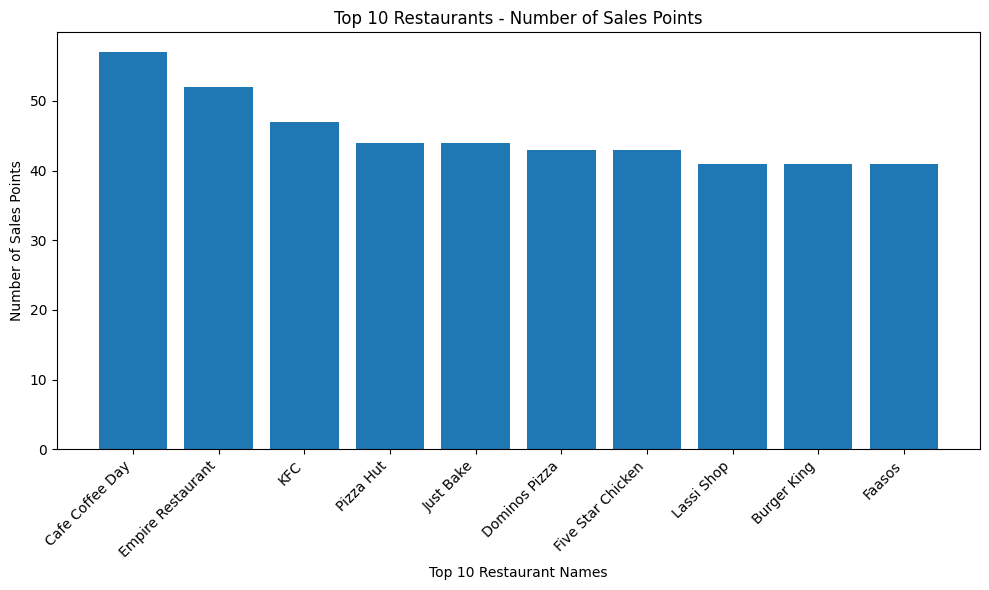

In [65]:
# Import matplotlib for data visualization and PySpark functions for data processing.
import matplotlib.pyplot as plt
from pyspark.sql.functions import col

# Step 1: Group by "name" and count the number of sales points, 
# then select the top 10 restaurants based on the count.
top_restaurants = df.groupBy("name").count().orderBy(col("count").desc()).limit(10)

# Step 2: Collect the top restaurant data as a list of Row objects.
top_restaurants_data = top_restaurants.collect()

# Step 3: Prepare x-axis (restaurant names) and y-axis (sales points count) data for plotting.
x = [row["name"] for row in top_restaurants_data]
y = [row["count"] for row in top_restaurants_data]

# Step 4: Create a bar plot to visualize the top 10 restaurants by number of sales points.
plt.figure(figsize=(10, 6))
plt.bar(x, y)
plt.xlabel("Top 10 Restaurant Names")
plt.ylabel("Number of Sales Points")
plt.title("Top 10 Restaurants - Number of Sales Points")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to avoid label clipping

# Step 5: Display the plot.
plt.show()

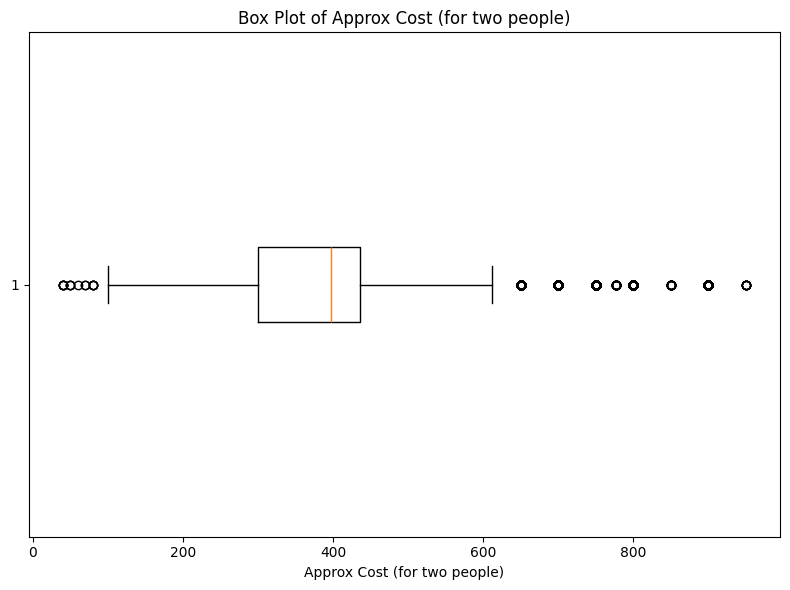

In [66]:
# Import matplotlib for visualization, numpy for numerical operations, and PySpark functions for data processing.
import matplotlib.pyplot as plt
import numpy as np
from pyspark.sql.functions import col

# Collect the "two_people_cost" data into a flat list,
# filtering out null values.
approx_cost_data = df.select("two_people_cost")\
                     .filter(col("two_people_cost").isNotNull())\
                     .rdd.flatMap(lambda x: x).collect()

# Create a horizontal box plot to visualize the distribution of approximate costs.
plt.figure(figsize=(8, 6))
plt.boxplot(approx_cost_data, vert=False)
plt.xlabel("Approx Cost (for two people)")
plt.title("Box Plot of Approx Cost (for two people)")
plt.tight_layout()  # Adjust layout to prevent label clipping

# Display the box plot.
plt.show()

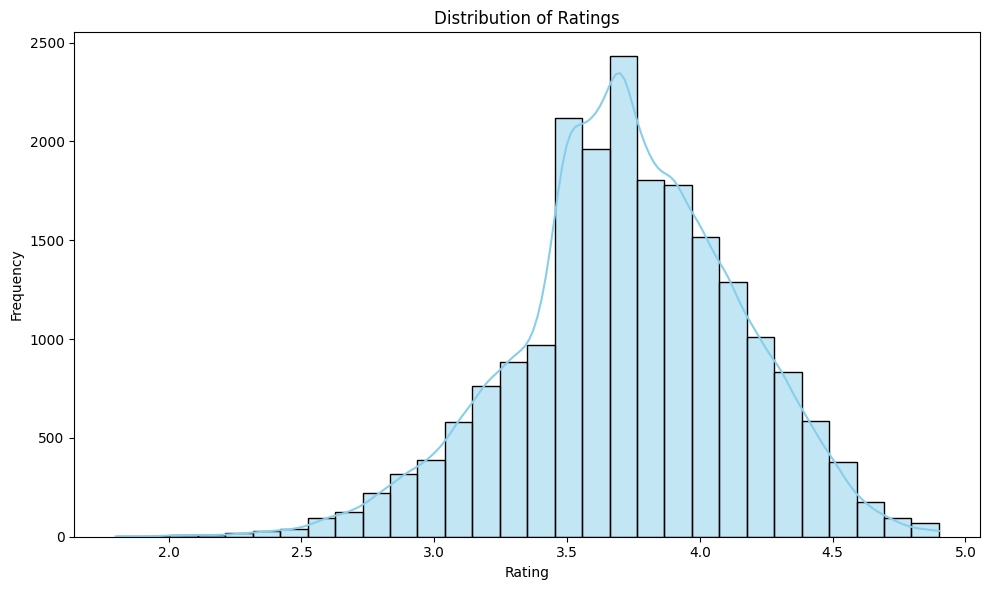

In [67]:
# Import seaborn for advanced statistical visualizations.
import seaborn as sns

# Collect the "rating" data into a flat list,
# filtering out null values.
rate_data = df.select("rating")\
              .filter(col("rating").isNotNull())\
              .rdd.flatMap(lambda x: x).collect()

# Create a histogram with a density curve to visualize the distribution of ratings.
plt.figure(figsize=(10, 6))
sns.histplot(rate_data, kde=True, bins=30, color="skyblue")  # kde=True adds a Kernel Density Estimate curve
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Ratings")
plt.tight_layout()  # Adjust layout to prevent label clipping

# Display the distribution plot.
plt.show()

In [68]:
# Suppress warnings to keep the notebook output clean.
import warnings
warnings.filterwarnings("ignore")

# Import Plotly modules for interactive data visualizations.
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)
import plotly as py
import plotly.graph_objs as go
from plotly import tools
import plotly.figure_factory as ff

# Import tools for label encoding and data splitting.
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Import linear, ensemble, and gradient boosting models.
from sklearn.linear_model import LinearRegression, ElasticNet, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Import tools for hyperparameter tuning and model evaluation.
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
# Suppress warnings to keep the notebook output clean.
import warnings
warnings.filterwarnings("ignore")

# Import Plotly modules for interactive data visualizations.
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)
import plotly as py
import plotly.graph_objs as go
from plotly import tools
import plotly.figure_factory as ff

# Import tools for label encoding and data splitting.
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Import linear, ensemble, and gradient boosting models.
from sklearn.linear_model import LinearRegression, ElasticNet, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Import tools for hyperparameter tuning and model evaluation.
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [69]:
df.printSchema()

root
 |-- location: string (nullable = true)
 |-- name: string (nullable = true)
 |-- online_order: string (nullable = true)
 |-- book_table: string (nullable = true)
 |-- votes: float (nullable = true)
 |-- rest_type: string (nullable = false)
 |-- dish_liked: string (nullable = false)
 |-- cuisines: string (nullable = false)
 |-- two_people_cost: float (nullable = true)
 |-- rating: double (nullable = true)



In [70]:
# Import StringIndexer for converting categorical string columns into numeric indices.
from pyspark.ml.feature import StringIndexer

# Define the list of categorical columns to be encoded.
columns_to_encode = ["online_order", "book_table", "location", "rest_type", "cuisines"]

# Apply StringIndexer to each column in the list and add a new column with '_index' suffix.
for col_name in columns_to_encode:
    indexer = StringIndexer(inputCol=col_name, outputCol=col_name + "_index")
    df = indexer.fit(df).transform(df)

In [71]:
# Display all distinct values from the "location" column.
df.select("location").distinct().show()

+--------------------+
|            location|
+--------------------+
|           Bangalore|
|            DRC Post|
|          BTM Layout|
|Near Silk Board B...|
|      Kanakpura Road|
|     Hosur Main Road|
|Phase 1 Electroni...|
|           Karnataka|
|Off Bannerghatta ...|
|Near kaka singh d...|
|Near Vodafone Sto...|
|           Bellandur|
|      East Bangalore|
|        Magrath Road|
|         Indiranagar|
|                 BTM|
|           Marthalli|
|        Banashankari|
|Koramangala 7th B...|
|               461/1|
+--------------------+
only showing top 20 rows



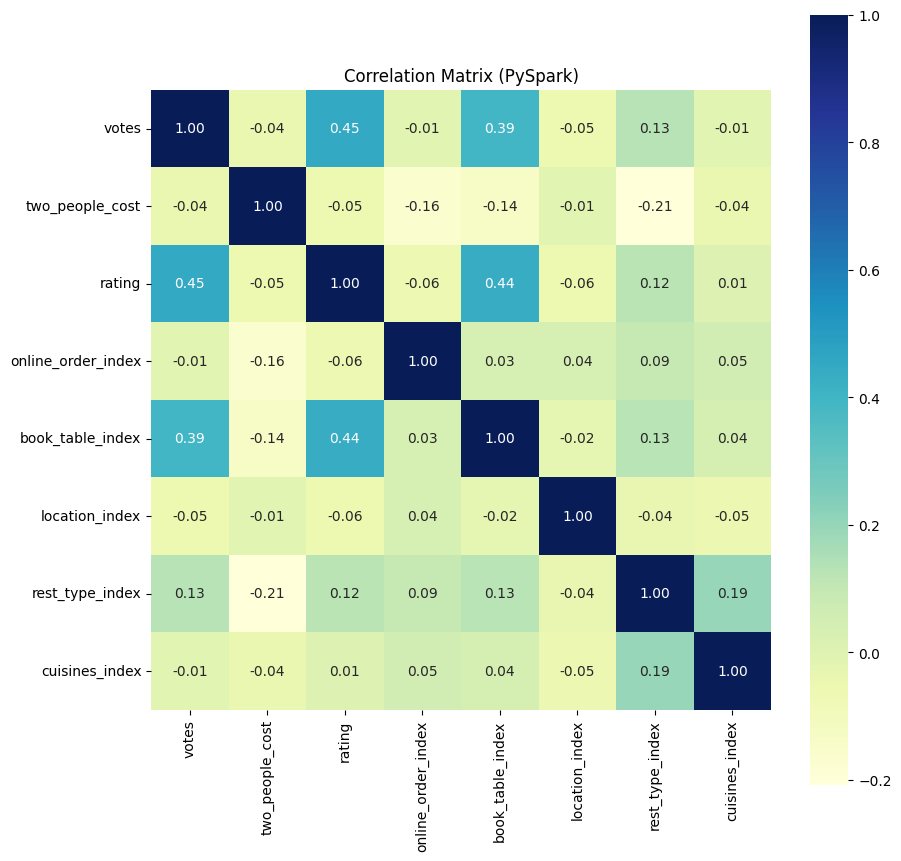

In [72]:
# Import necessary libraries for type checking, data handling, and visualization.
from pyspark.sql.types import NumericType
import pandas as pd

# Extract the names of numeric columns from the DataFrame schema.
numeric_cols = [field.name for field in df.schema.fields if isinstance(field.dataType, NumericType)]

# Compute pairwise Pearson correlation values between all numeric columns.
correlations = {}
for i in range(len(numeric_cols)):
    for j in range(i, len(numeric_cols)):
        col1 = numeric_cols[i]
        col2 = numeric_cols[j]
        corr_value = df.stat.corr(col1, col2)
        correlations[(col1, col2)] = corr_value

# Create a symmetric correlation matrix using pandas.
corr_matrix = pd.DataFrame(index=numeric_cols, columns=numeric_cols)
for (col1, col2), value in correlations.items():
    corr_matrix.loc[col1, col2] = value
    corr_matrix.loc[col2, col1] = value  # Fill both [i,j] and [j,i]

# Convert matrix values to float type for visualization.
corr_matrix = corr_matrix.astype(float)

# Plot the correlation matrix as a heatmap using seaborn.
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", square=True, fmt=".2f")
plt.title("Correlation Matrix (PySpark)")
plt.show()


In [73]:
# Separate the target variable 'rating' into y.
y = df.select("rating")

# Drop the 'rating' column from the DataFrame to create the feature set x.
x = df.drop("rating")

# Print the shapes (row count, column count) of y and x.
print("Shape of y:", (y.count(), len(y.columns)))
print("Shape of x:", (x.count(), len(x.columns)))

Shape of y: (20513, 1)


Shape of x: (20513, 14)


In [74]:
# Split the DataFrame into training and testing sets using an 80-20 ratio.
# A fixed seed is set for reproducibility of the split.
train_data, test_data = df.randomSplit([0.8, 0.2], seed=42)

In [75]:
# Print the schema of the DataFrame to review data types and structure before model building.
df.printSchema()

root
 |-- location: string (nullable = true)
 |-- name: string (nullable = true)
 |-- online_order: string (nullable = true)
 |-- book_table: string (nullable = true)
 |-- votes: float (nullable = true)
 |-- rest_type: string (nullable = false)
 |-- dish_liked: string (nullable = false)
 |-- cuisines: string (nullable = false)
 |-- two_people_cost: float (nullable = true)
 |-- rating: double (nullable = true)
 |-- online_order_index: double (nullable = false)
 |-- book_table_index: double (nullable = false)
 |-- location_index: double (nullable = false)
 |-- rest_type_index: double (nullable = false)
 |-- cuisines_index: double (nullable = false)



In [76]:
# Drop the "name" and "dish_liked" columns, which are not required for modeling.
df = df.drop("name", "dish_liked")

In [77]:
# Print the schema of the DataFrame to review data types and structure before model building.
df.printSchema()

root
 |-- location: string (nullable = true)
 |-- online_order: string (nullable = true)
 |-- book_table: string (nullable = true)
 |-- votes: float (nullable = true)
 |-- rest_type: string (nullable = false)
 |-- cuisines: string (nullable = false)
 |-- two_people_cost: float (nullable = true)
 |-- rating: double (nullable = true)
 |-- online_order_index: double (nullable = false)
 |-- book_table_index: double (nullable = false)
 |-- location_index: double (nullable = false)
 |-- rest_type_index: double (nullable = false)
 |-- cuisines_index: double (nullable = false)



In [78]:
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.regression import LinearRegression
string_cols = ["online_order", "book_table", "location", "rest_type", "cuisines"]

In [79]:
# Drop any remaining original string columns from the DataFrame (if not already removed).
df = df.drop(*string_cols)

# Step 3: Define the list of feature columns by excluding the target column "rating".
feature_cols = [col for col in df.columns if col != "rating"]

# Drop any rows containing null values to ensure clean input for model training.
df = df.na.drop()

In [80]:
# Print the schema of the DataFrame to verify that all feature columns are numeric 
# and no StringType columns remain before model training.
df.printSchema()

root
 |-- votes: float (nullable = true)
 |-- two_people_cost: float (nullable = true)
 |-- rating: double (nullable = true)
 |-- online_order_index: double (nullable = false)
 |-- book_table_index: double (nullable = false)
 |-- location_index: double (nullable = false)
 |-- rest_type_index: double (nullable = false)
 |-- cuisines_index: double (nullable = false)



In [81]:
# Create a copy of the current DataFrame for backup or alternative processing.
df_cop = df

In [82]:
# Assemble all feature columns into a single "features" vector column for ML modeling.
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
df_ml = assembler.transform(df).select("features", "rating")

# Split the assembled DataFrame into training and testing sets (80-20 split).
train_data, test_data = df_ml.randomSplit([0.8, 0.2], seed=42)

# Initialize and train a Linear Regression model using the assembled features and the "rating" label.
lr = LinearRegression(featuresCol="features", labelCol="rating")
lr_model = lr.fit(train_data)

# Confirm model training completion.
print("Model trained successfully.")

25/04/29 23:23:28 WARN Instrumentation: [64e9cb50] regParam is zero, which might cause numerical instability and overfitting.
25/04/29 23:23:29 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
25/04/29 23:23:29 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK


Model trained successfully.


In [83]:
# Reinitialize the Linear Regression model with specified feature and label columns.
lr = LinearRegression(featuresCol="features", labelCol="rating")
lr_model = lr.fit(train_data)

# Generate predictions on the training and testing datasets.
train_predictions = lr_model.transform(train_data)
test_predictions = lr_model.transform(test_data)

25/04/29 23:24:04 WARN Instrumentation: [ea87f3ce] regParam is zero, which might cause numerical instability and overfitting.


In [84]:
#REGRESSION RESULT

In [85]:
# Import the RegressionEvaluator for evaluating regression model performance.
from pyspark.ml.evaluation import RegressionEvaluator

# Initialize evaluators for RMSE, R², and MAE.
evaluator_rmse = RegressionEvaluator(labelCol="rating", predictionCol="prediction", metricName="rmse")
evaluator_r2 = RegressionEvaluator(labelCol="rating", predictionCol="prediction", metricName="r2")
evaluator_mae = RegressionEvaluator(labelCol="rating", predictionCol="prediction", metricName="mae")

# Evaluate performance on training and testing sets.
train_rmse = evaluator_rmse.evaluate(train_predictions)
test_rmse = evaluator_rmse.evaluate(test_predictions)
train_mae = evaluator_mae.evaluate(train_predictions)
test_mae = evaluator_mae.evaluate(test_predictions)
r2_score = evaluator_r2.evaluate(test_predictions)

# Print evaluation metrics.
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Train MAE:", train_mae)
print("Test MAE:", test_mae)
print("R² Score on Test Set:", r2_score)

Train RMSE: 0.35265103603286485
Test RMSE: 0.35055697224857046
Train MAE: 0.2664352719260719
Test MAE: 0.26459787542586716
R² Score on Test Set: 0.23074614497460877


In [86]:
#ELASTIC NET REGRESSION

In [87]:
# Import ElasticNet-style Linear Regression model and evaluation utilities.
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

# Create an ElasticNet-style Linear Regression model.
elasticnet_reg = LinearRegression(
    featuresCol="features",
    labelCol="rating",
    elasticNetParam=0.5,  # 0.0 = Ridge, 1.0 = Lasso, 0.5 = ElasticNet
    regParam=0.1          # Regularization strength
)

# Fit the model to the training data.
elasticnet_model = elasticnet_reg.fit(train_data)

#  Generate predictions on both training and testing datasets.
train_predictions = elasticnet_model.transform(train_data)
test_predictions = elasticnet_model.transform(test_data)

# Initialize evaluators for RMSE, R², and MAE.
evaluator_rmse = RegressionEvaluator(labelCol="rating", predictionCol="prediction", metricName="rmse")
evaluator_r2 = RegressionEvaluator(labelCol="rating", predictionCol="prediction", metricName="r2")
evaluator_mae = RegressionEvaluator(labelCol="rating", predictionCol="prediction", metricName="mae")

# Evaluate on train and test sets.
train_rmse = evaluator_rmse.evaluate(train_predictions)
test_rmse = evaluator_rmse.evaluate(test_predictions)
train_mae = evaluator_mae.evaluate(train_predictions)
test_mae = evaluator_mae.evaluate(test_predictions)
r2_score = evaluator_r2.evaluate(test_predictions)

# Print evaluation results.
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Train MAE:", train_mae)
print("Test MAE:", test_mae)
print("---" * 30)
print("R² Score on Test Set:", r2_score)

Train RMSE: 0.36248017487883727
Test RMSE: 0.3596889385609385
Train MAE: 0.27804995550551026
Test MAE: 0.27539305820178134
------------------------------------------------------------------------------------------
R² Score on Test Set: 0.19014619433664037


In [88]:
#RANDOM FOREST 

In [89]:
train_data.printSchema()

root
 |-- features: vector (nullable = true)
 |-- rating: double (nullable = true)



In [90]:
df_cop.printSchema()

root
 |-- votes: float (nullable = true)
 |-- two_people_cost: float (nullable = true)
 |-- rating: double (nullable = true)
 |-- online_order_index: double (nullable = false)
 |-- book_table_index: double (nullable = false)
 |-- location_index: double (nullable = false)
 |-- rest_type_index: double (nullable = false)
 |-- cuisines_index: double (nullable = false)



In [91]:
from pyspark.sql.functions import col, when, lit
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator

# Group high-cardinality categorical values into top-N and bucket the rest as -1
top_n = 10

def bucketize_column(df, col_name):
    top_values_df = df.groupBy(col_name).count().orderBy(col("count").desc()).limit(top_n)
    top_ids = [row[col_name] for row in top_values_df.collect()]
    new_col = col_name + "_binned"
    df = df.withColumn(new_col, when(col(col_name).isin(top_ids), col(col_name)).otherwise(lit(-1)))
    df = df.drop(col_name)
    return df

df_cop = bucketize_column(df_cop, "location_index")
df_cop = bucketize_column(df_cop, "rest_type_index")
df_cop = bucketize_column(df_cop, "cuisines_index")

# Define the feature columns to use in the model
feature_cols = [
    "votes", "two_people_cost",
    "online_order_index", "book_table_index",
    "location_index_binned", "rest_type_index_binned", "cuisines_index_binned"
]

# Assemble the features into a single vector column
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
df_ml = assembler.transform(df_cop).select("features", "rating").na.drop()

# Split the dataset into training and testing sets
train_data, test_data = df_ml.randomSplit([0.8, 0.2], seed=42)

# Initialize and train the Random Forest Regressor
rf = RandomForestRegressor(
    featuresCol="features",
    labelCol="rating",
    numTrees=200,
    maxDepth=9,
    maxBins=64,
    seed=42
)
rf_model = rf.fit(train_data)

# Make predictions on training and testing sets
train_predictions = rf_model.transform(train_data)
test_predictions = rf_model.transform(test_data)

# Initialize regression evaluators for RMSE, MAE, and R²
evaluator_rmse = RegressionEvaluator(labelCol="rating", predictionCol="prediction", metricName="rmse")
evaluator_mae = RegressionEvaluator(labelCol="rating", predictionCol="prediction", metricName="mae")
evaluator_r2 = RegressionEvaluator(labelCol="rating", predictionCol="prediction", metricName="r2")

# Evaluate model performance
train_rmse = evaluator_rmse.evaluate(train_predictions)
test_rmse = evaluator_rmse.evaluate(test_predictions)
train_mae = evaluator_mae.evaluate(train_predictions)
test_mae = evaluator_mae.evaluate(test_predictions)
r2_score = evaluator_r2.evaluate(test_predictions)

# Print evaluation results
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Train MAE:", train_mae)
print("Test MAE:", test_mae)
print("R² Score on Test Set:", r2_score)

25/04/29 23:27:46 WARN DAGScheduler: Broadcasting large task binary with size 1326.0 KiB
25/04/29 23:27:47 WARN DAGScheduler: Broadcasting large task binary with size 2.2 MiB
25/04/29 23:27:49 WARN DAGScheduler: Broadcasting large task binary with size 3.8 MiB
25/04/29 23:27:51 WARN DAGScheduler: Broadcasting large task binary with size 1018.3 KiB
25/04/29 23:27:52 WARN DAGScheduler: Broadcasting large task binary with size 6.6 MiB
25/04/29 23:27:54 WARN DAGScheduler: Broadcasting large task binary with size 1716.9 KiB
25/04/29 23:27:57 WARN DAGScheduler: Broadcasting large task binary with size 10.9 MiB
25/04/29 23:28:00 WARN DAGScheduler: Broadcasting large task binary with size 2.6 MiB


Train RMSE: 0.2831966774501819
Test RMSE: 0.2899093457830112
Train MAE: 0.197174883013578
Test MAE: 0.2015075919398765
R² Score on Test Set: 0.47717965536108986


In [92]:
#XGBOOST

In [93]:
# Convert the Spark DataFrame to a pandas DataFrame for compatibility with XGBoost.
pandas_df = df.toPandas()

# Drop rows with any NaN values, since XGBoost does not handle NaNs directly.
pandas_df = pandas_df.dropna()

# Separate features and target variable.
X = pandas_df.drop(columns=["rating"])
y = pandas_df["rating"]

# Split the data into training and testing sets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost regressor with specified hyperparameters.
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

xgb = XGBRegressor(
    colsample_bytree=1,
    learning_rate=0.5,
    max_depth=6,
    n_estimators=1000,
    random_state=42
)
xgb_model = xgb.fit(X_train, y_train)

# Evaluate model performance on training and test data.
train_rmse = np.sqrt(mean_squared_error(y_train, xgb_model.predict(X_train)))
test_rmse = np.sqrt(mean_squared_error(y_test, xgb_model.predict(X_test)))
train_mae = mean_absolute_error(y_train, xgb_model.predict(X_train))
test_mae = mean_absolute_error(y_test, xgb_model.predict(X_test))
r2 = r2_score(y_test, xgb_model.predict(X_test))

# Print evaluation metrics.
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Train MAE:", train_mae)
print("Test MAE:", test_mae)
print("R² Score:", r2)

Train RMSE: 0.08203201230137706
Test RMSE: 0.27605196614323924
Train MAE: 0.033969313936034605
Test MAE: 0.16277144609443286
R² Score: 0.5201177279198281


In [94]:
import pandas as pd

# Predict target values for the X_test set using the trained XGBoost model.
y_pred_XGB = xgb_model.predict(X_test)

# Create a DataFrame to compare actual vs. predicted ratings.
xgb_results_pd = pd.DataFrame({
    "y_actual": y_test.reset_index(drop=True),
    "y_pred_XGBOOST": pd.Series(y_pred_XGB).reset_index(drop=True)
})

In [95]:
import pandas as pd

# Create a DataFrame comparing actual and predicted ratings.
xgb_results_pd = pd.DataFrame({
    "y_actual": y_test.reset_index(drop=True),
    "y_pred_XGBOOST": pd.Series(y_pred_XGB)
})

# Convert the pandas DataFrame to a PySpark DataFrame for further Spark-based analysis or storage.
xgb_results_spark = spark.createDataFrame(xgb_results_pd)

In [96]:
from pyspark.sql.functions import monotonically_increasing_id

# Generate predictions from all models and select relevant columns with renamed predictions.
linear_df = lr_model.transform(test_data).select("rating", col("prediction").alias("y_pred_linear"))
elastic_df = elasticnet_model.transform(test_data).select("rating", col("prediction").alias("y_pred_elasticNET"))
rf_df = rf_model.transform(test_data).select("rating", col("prediction").alias("y_pred_randomForest"))

# Define a utility function to add a monotonically increasing row ID for joining DataFrames.
def add_index(df, index_name="row_id"):
    return df.withColumn(index_name, monotonically_increasing_id())

# Add row indices to each DataFrame to allow precise alignment during joins.
xgb_results_spark = add_index(xgb_results_spark)
linear_df = add_index(linear_df)
elastic_df = add_index(elastic_df)
rf_df = add_index(rf_df)

# Join predictions from all models using the row index and select final comparison columns.
results_spark = xgb_results_spark \
    .join(linear_df, on="row_id") \
    .join(elastic_df, on="row_id") \
    .join(rf_df, on="row_id") \
    .select(
        "y_actual",
        "y_pred_XGBOOST",
        "y_pred_linear",
        "y_pred_elasticNET",
        "y_pred_randomForest"
    )

# Display a preview of the combined results.
results_spark.show(10)

+--------+------------------+------------------+------------------+-------------------+
|y_actual|    y_pred_XGBOOST|     y_pred_linear| y_pred_elasticNET|y_pred_randomForest|
+--------+------------------+------------------+------------------+-------------------+
|     3.5| 3.494716167449951|3.6376143508253085| 3.637163220040716| 3.3445951354942145|
|     3.5| 3.350804090499878|3.6381155220090013| 3.637500717566469|  3.357639363268983|
|     3.4|3.4291231632232666| 3.638282579070232|  3.63761321674172| 3.3843764086867565|
|     3.8|3.6659951210021973| 3.638449636131463|3.6377257159169716| 3.4105559296026877|
|     4.3|4.3004841804504395|3.6392849214376173|3.6382882117932267| 3.4499655929033435|
|     4.1|4.0988359451293945|3.6394519784988484| 3.638400710968478| 3.4495495056957926|
|     3.9|3.9406261444091797| 3.640120206743772|3.6388507076694823| 3.4533117009105614|
|     3.3| 3.342681407928467|3.6407884349886954| 3.639300704370487| 3.4760968630343183|
|     4.0| 3.999103307723999|3.6

In [97]:
from pyspark.ml.evaluation import RegressionEvaluator
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize PySpark regression evaluator for RMSE.
evaluator = RegressionEvaluator(labelCol="rating", predictionCol="prediction", metricName="rmse")

# Evaluate RMSE for Linear Regression.
linear_rmse = evaluator.evaluate(lr_model.transform(test_data))

# Evaluate RMSE for ElasticNet Regression.
elastic_rmse = evaluator.evaluate(elasticnet_model.transform(test_data))

# Evaluate RMSE for Random Forest Regression.
rf_rmse = evaluator.evaluate(rf_model.transform(test_data))

# Evaluate RMSE for XGBoost using scikit-learn (on pandas DataFrame).
XGBoost_RMSE = np.sqrt(mean_squared_error(y_test, y_pred_XGB))

In [98]:
import pandas as pd
import plotly.express as px

# Create a DataFrame containing RMSE values for each regression model.
models_RMSE = pd.DataFrame({
    "Models": ["Linear Regression", "Elastic Net", "Random Forest", "XGBoost"],
    "RMSE": [linear_rmse, elastic_rmse, rf_rmse, XGBoost_RMSE]
})

# Create a horizontal bar chart to compare RMSE across models.
fig = px.bar(
    models_RMSE,
    x='RMSE',
    y='Models',
    orientation='h',
    hover_data=['RMSE'],
    color='Models',
    height=400,
    title="Root Mean Squared Error of Models"
)

# Display the interactive bar chart.
fig.show()